In [9]:
import sys
import os
sys.path.append('/home/tpopova/prj/polymer_brush')


from py_utils.annealing_brush import annealing_anion
from py_utils.quenched_brush import quecnhed_br

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation
class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)

def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

In [10]:
#ПАРАМЕТРЫ
N = 400
S = 100
Cs = 0.001

pK_brush = 4.5
pK_minus = 3
pK_plus = 7
f_plus = 0.49

delta_pK_brush = -0.4

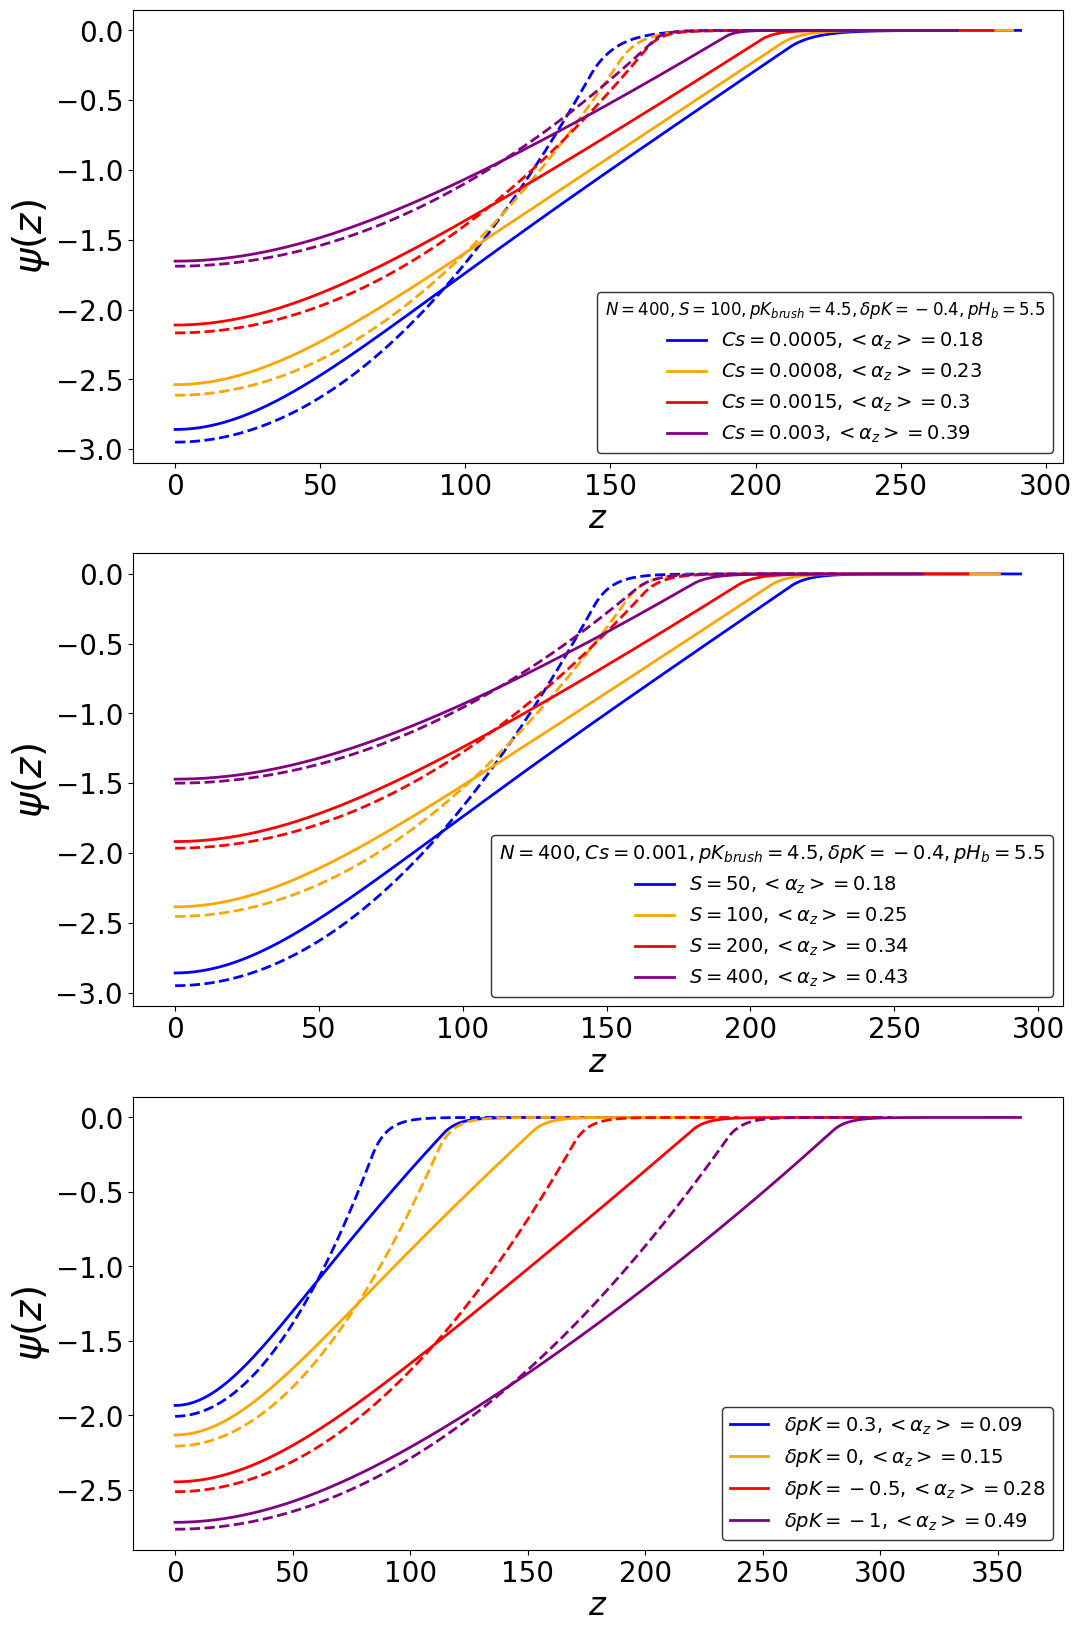

In [11]:
from termios import CS6, CSTART


Cs_range = [0.0005, 0.0008, 0.0015, 0.003]
S_range = [50, 100, 200, 400]
delt_pK_range = [0.3, 0, -0.5, -1]

colors = ['blue', 'orange', 'red', 'purple', 'limegreen', 'pink', 'olive']

fig, axs = plt.subplots(nrows= 3 , ncols= 1 )

for cs, color in zip(Cs_range, colors):
        #СЛАБАЯ ЩЕТКА

       H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi,  = annealing_anion(
        N = N, 
        S = S,
        Cs = cs,
        delta_pK = delta_pK_brush,
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = 'annealing_brush_temp.pro', 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')
        
        #СИЛЬНАЯ ЩЕТКА
       H_q, Lambda, \
        d_pH_b, pH_iep_in_quen, \
        z_in_range_q, z_out_range_q, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = quecnhed_br(
        
                N = N, 
                S = S, 
                alpha = alpha_z_mean,
                Cs = cs,
                PK_MINUS = pK_minus,
                PK_PLUS = pK_plus,
                f_plus = f_plus,
                
                pH_B = pH_b,

                file_names = 'flat_anion_brush_temp.pro',
                way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')
        
       axs[0].plot(np.hstack((z_in_range, z_out_range)), np.hstack((psi_in, psi_out)), linestyle = '-',
        linewidth = 2, color = color, label = f'$Cs = {cs}, <\\alpha_z> = {round(alpha_z_mean, 2)}$')
        
       axs[0].plot(np.hstack((z_in_range_q, z_out_range_q)), np.hstack((y_in, y_out)), linestyle = '--',
        linewidth = 2, color = color)

for s, color in zip(S_range, colors):
        #СЛАБАЯ ЩЕТКА

        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi,  = annealing_anion(
        N = N, 
        S = s,
        Cs = Cs,
        delta_pK = delta_pK_brush,
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = 'annealing_brush_temp.pro', 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')

        #СИЛЬНАЯ ЩЕТКА

        H_q, Lambda, \
        d_pH_b, pH_iep_in_quen, \
        z_in_range_q, z_out_range_q, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = quecnhed_br(
        
                N = N, 
                S = s, 
                alpha = alpha_z_mean,
                Cs = Cs,
                PK_MINUS = pK_minus,
                PK_PLUS = pK_plus,
                f_plus = f_plus,
                
                pH_B = pH_b,

                file_names = 'flat_anion_brush_temp.pro',
                way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')
        
        axs[1].plot(np.hstack((z_in_range, z_out_range)), np.hstack((psi_in, psi_out)), linestyle = '-',
        linewidth = 2, color = color, label = f'$S = {s}, <\\alpha_z> = {round(alpha_z_mean, 2)}$')
        
        axs[1].plot(np.hstack((z_in_range_q, z_out_range_q)), np.hstack((y_in, y_out)), linestyle = '--',
        linewidth = 2, color = color)

for dpk, color in zip(delt_pK_range, colors):
        #СЛАБАЯ ЩЕТКА

        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi,  = annealing_anion(
        N = N, 
        S = S,
        Cs = Cs,
        delta_pK = dpk,
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = 'annealing_brush_temp.pro', 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')

        #СИЛЬНАЯ ЩЕТКА

        H_q, Lambda, \
        d_pH_b, pH_iep_in_quen, \
        z_in_range_q, z_out_range_q, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = quecnhed_br(
        
                N = N, 
                S = S, 
                alpha = alpha_z_mean,
                Cs = Cs,
                PK_MINUS = pK_minus,
                PK_PLUS = pK_plus,
                f_plus = f_plus,
                
                pH_B = pH_b,

                file_names = 'flat_anion_brush_temp.pro',
                way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')
        
        axs[2].plot(np.hstack((z_in_range, z_out_range)), np.hstack((psi_in, psi_out)), linestyle = '-',
        linewidth = 2, color = color, label = f'$\delta pK = {dpk}, <\\alpha_z> = {round(alpha_z_mean, 2)}$')
        
        axs[2].plot(np.hstack((z_in_range_q, z_out_range_q)), np.hstack((y_in, y_out)), linestyle = '--',
        linewidth = 2, color = color)

axs[0].set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

axs[1].set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

axs[2].set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

axs[0].set_ylabel("$\psi(z)$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)
axs[1].set_ylabel("$\psi(z)$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)

axs[2].set_ylabel("$\psi(z)$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)

axs[0].legend(title = f'$N = {N} , S = {S}, pK_{{brush}} = {pK_brush}, \delta pK = {delta_pK_brush}, pH_b = {round(pH_b, 2)}$',
    fontsize = 14, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '12', 
        loc = 'lower right')

axs[1].legend(title = f'$N = {N} , Cs = {Cs}, pK_{{brush}} = {pK_brush}, \delta pK = {delta_pK_brush}, pH_b = {round(pH_b, 2)}$',
    fontsize = 14, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '14', 
        loc = 'lower right')

axs[2].legend(
    fontsize = 14, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '14', 
        loc = 'lower right')

fig.set_figwidth(12)
fig.set_figheight(20)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# save = fig.savefig('наложение_теория_намикс_абсорбция.svg', dpi = 200)

plt.show()


alphaZ для мягкой щетки

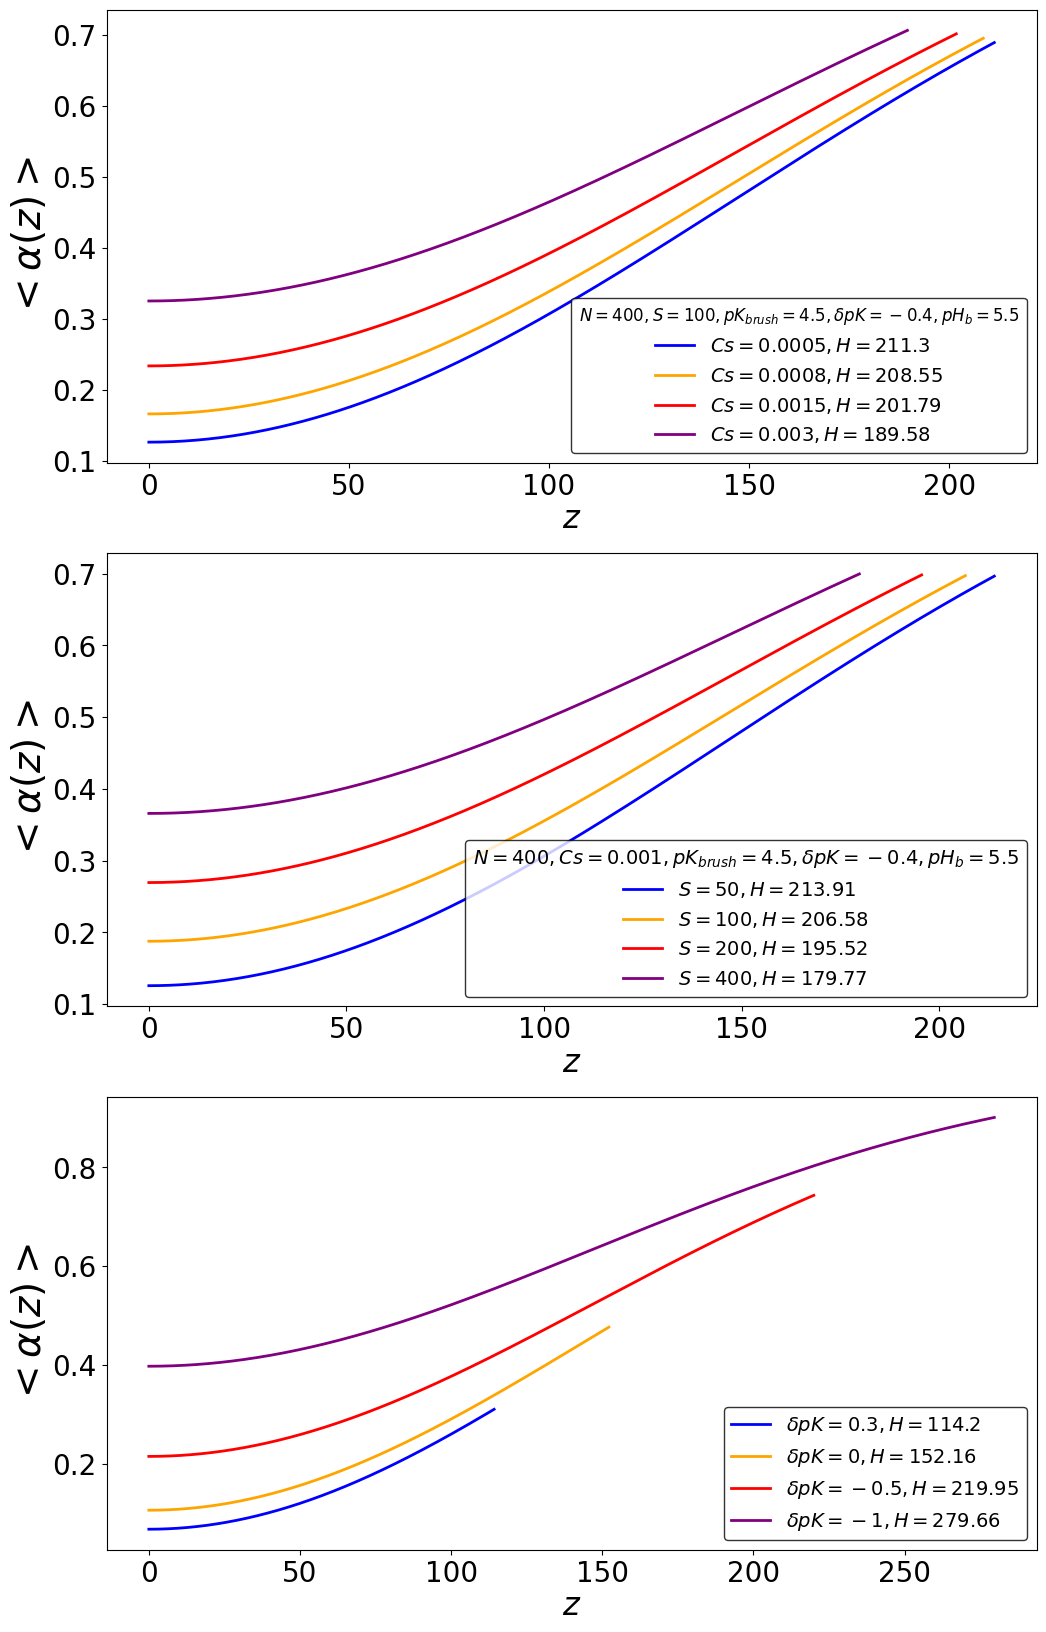

In [12]:
Cs_range = [0.0005, 0.0008, 0.0015, 0.003]
S_range = [50, 100, 200, 400]
delt_pK_range = [0.3, 0, -0.5, -1]

colors = ['blue', 'orange', 'red', 'purple', 'limegreen', 'pink', 'olive']

fig, axs = plt.subplots(nrows= 3 , ncols= 1 )

for cs, color in zip(Cs_range, colors):
        #СЛАБАЯ ЩЕТКА
        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi,   = annealing_anion(
        N = N, 
        S = S,
        Cs = cs,
        delta_pK = delta_pK_brush,
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = 'annealing_brush_temp.pro', 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')
            
        axs[0].plot(z_in_range, alpha_z, linestyle = '-',
        linewidth = 2, color = color, label = f'$Cs = {cs}, H = {round(H, 2)}$')
        
for s, color in zip(S_range, colors):
        #СЛАБАЯ ЩЕТКА

        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi,   = annealing_anion(
        N = N, 
        S = s,
        Cs = Cs,
        delta_pK = delta_pK_brush,
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = 'annealing_brush_temp.pro', 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')

        
        axs[1].plot(z_in_range, alpha_z, linestyle = '-',
        linewidth = 2, color = color, label = f'$S = {s}, H = {round(H, 2)}$')

for dpk, color in zip(delt_pK_range, colors):
        #СЛАБАЯ ЩЕТКА

        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi,   = annealing_anion(
        N = N, 
        S = S,
        Cs = Cs,
        delta_pK = dpk,
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = 'annealing_brush_temp.pro', 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')

    
        axs[2].plot(z_in_range, alpha_z, linestyle = '-',
        linewidth = 2, color = color, label = f'$\delta pK = {dpk}, H = {round(H, 2)}$')
        

axs[0].set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

axs[1].set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

axs[2].set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

axs[0].set_ylabel("$<\\alpha(z)>$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)
axs[1].set_ylabel("$<\\alpha(z)>$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)

axs[2].set_ylabel("$<\\alpha(z)>$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)

axs[0].legend(title = f'$N = {N} , S = {S}, pK_{{brush}} = {pK_brush}, \delta pK = {delta_pK_brush}, pH_b = {round(pH_b, 2)}$',
    fontsize = 14, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '12', 
        loc = 'lower right')

axs[1].legend(title = f'$N = {N} , Cs = {Cs}, pK_{{brush}} = {pK_brush}, \delta pK = {delta_pK_brush}, pH_b = {round(pH_b, 2)}$',
    fontsize = 14, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '14', 
        loc = 'lower right')

axs[2].legend(
    fontsize = 14, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '14', 
        loc = 'lower right')

fig.set_figwidth(12)
fig.set_figheight(20)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# save = fig.savefig('наложение_теория_намикс_абсорбция.svg', dpi = 200)

plt.show()


Электростатический потенциал при разных pH